In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from nbodykit.lab import cosmology

import scipy
from scipy import optimize

In [2]:
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)


In [115]:
def xi(r):
    #return (r-6)**2 + 1 
    return np.sin(r)

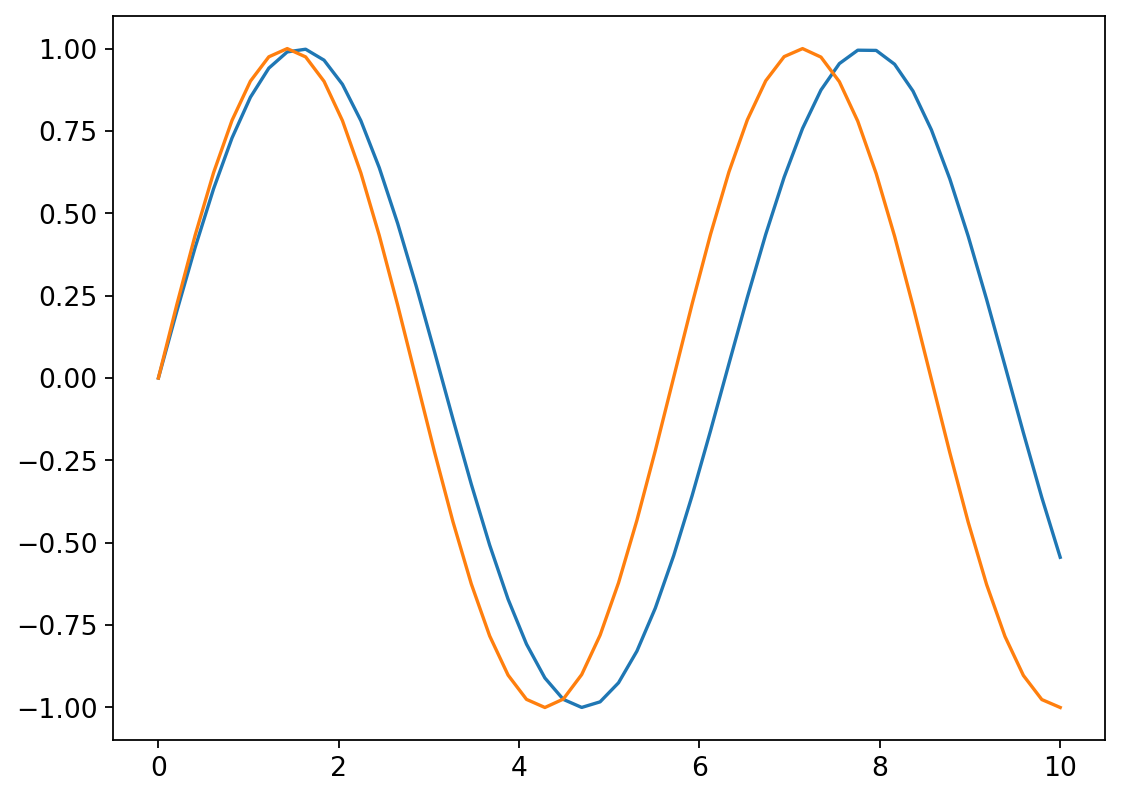

In [116]:
alpha = 1.1
r = np.linspace(0, 10)
plt.plot(r, xi(r))
plt.plot(r, xi(alpha*r))

In [9]:
def partial_derivative(f1, f2, dv):
    df = f2-f1
    deriv = df/dv
    return deriv

In [5]:
def derivative(r, f, preserve_dims=True):
    df = f[1:]-f[:-1]
    dr = r[1:]-r[:-1]
    deriv = df/dr
    # how to do??
    if preserve_dims:
        deriv = np.append(deriv, deriv[-1])
        return r, deriv
    else:
        ravg = 0.5*(r[1:]+r[:-1])
        return ravg, deriv

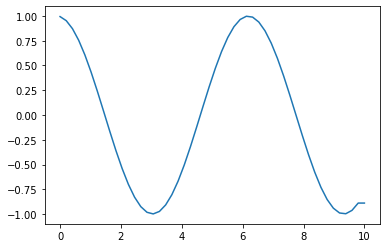

In [6]:
r, dxi_dr = derivative(r, xi(r))
plt.plot(r, dxi_dr)

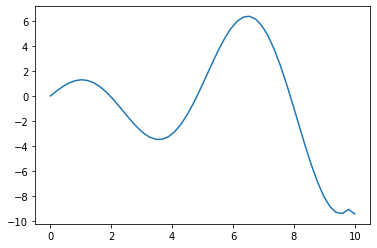

In [7]:
xi_model = xi(r)
fit = xi_model + r*dxi_dr
plt.plot(r, fit)

d partial_derivative(xi(r), xi(alpha*r), alpha)
d_dalpha xi(alpha*r) =  r d/dalpha[ xi(alpha * r) ]

In [8]:
Bsq = 1
C = 1
a1 = 1
a2 = 1
a3 = 1

In [9]:
r = np.linspace(0, 10)
xi_model = xi(r)
ravg, dxi_dr = derivative(r, xi_model)

In [10]:
xi_fit = Bsq * xi_model + C * r*dxi_dr + a1/r**2 + a2/r + a3

/home/users/ksf293/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


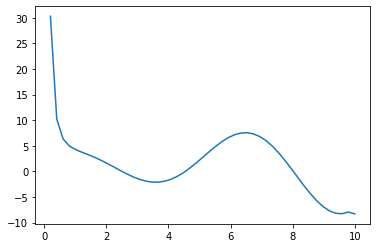

In [11]:
plt.plot(r, xi_fit)

f = (r)^2
f(ar) = (ar)^2
df/da = 2*a r^2

( xi(alpha*r + dalpha) - xi(alpha*r) )/dalpha
this is correct to do numerically, don't need chain rule!
see https://math.stackexchange.com/questions/1492684/numerical-derivative-of-compoiste-function

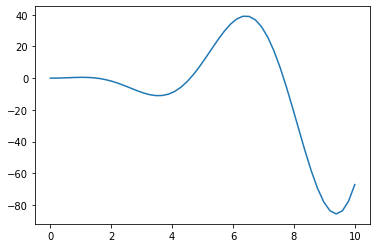

In [15]:
alpha = 1.05
dalpha = alpha-1
partial = partial_derivative(xi(r), xi(alpha*r), dalpha)
plt.plot(r, r*partial)

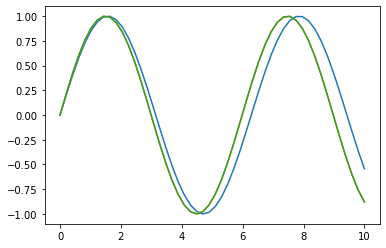

In [17]:
plt.plot(r, xi(r))
plt.plot(r, xi(r)+dalpha*partial)
plt.plot(r, xi(alpha*r))

In [ ]:
dalpha = alpha*partial

In [55]:
cosmo_model = cosmology.Planck15
redshift = 0
smin = 40
smax = 150
s = np.linspace(smin, smax, 300)

In [56]:
Plin = cosmology.LinearPower(cosmo_model, redshift, transfer='EisensteinHu')
CF = cosmology.correlation.CorrelationFunction(Plin)
xi_model = CF(s)

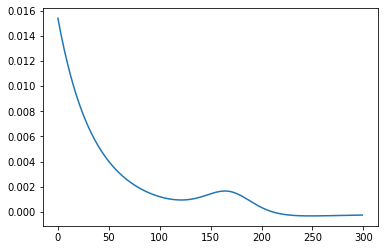

In [57]:
plt.plot(xi_model)

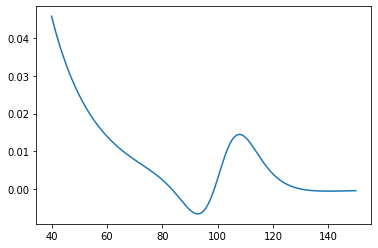

In [154]:
alpha = 1.03
dalpha = 1-alpha
dxi_dalpha = partial_derivative(CF(s), CF(alpha*s), dalpha)
plt.plot(s, dxi_dalpha)

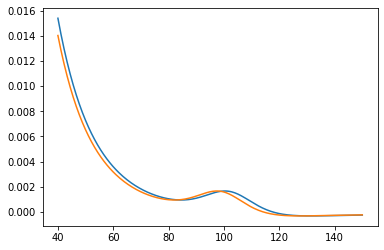

In [155]:
plt.plot(s, xi_model)
plt.plot(s, xi_model + dalpha*dxi_dalpha)

In [79]:
b1 = xi_model
b2 = dalpha*dxi_dalpha
b3 = 0.01 * 1.0/s**2
b4 = 0.01 * 1.0/s
b5 = np.ones(len(s))/1000.
bases = [b1,b2,b3,b4,b5]

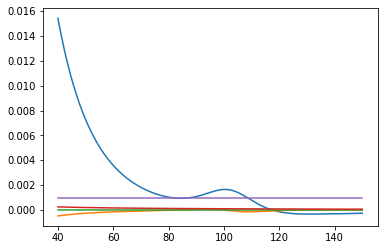

In [80]:
for b in bases:
    plt.plot(s, b)

# Fitting BAO

Create model with certain alpha, sample at finite s, and add gaussian noise

In [3]:
def partial_derivative(f1, f2, dv):
    df = f2-f1
    deriv = df/dv
    return deriv

In [4]:
def load_cf(directory, cat_tag, proj, seed=None):
    if 'true' in proj:
        data = np.load('{}/cf_lin_true{}.npy'.format(directory, cat_tag), allow_pickle=True, encoding='latin1')
        r, xi, _ = data
        return r, xi
    elif 'standard' in proj:
        tag = cat_tag+'_seed{}'.format(seed)
        data = np.load('{}/cf_lin_{}{}.npy'.format(directory, proj, tag), allow_pickle=True, encoding='latin1')
        r, xi, _ = data
        return r, xi
    else:    
        tag = cat_tag+'_seed{}'.format(seed)
        data = np.load('{}/cf_lin_{}{}.npy'.format(directory, proj, tag), allow_pickle=True, encoding='latin1')
        r, xi, amp, _ = data
        return r, xi, amp

In [5]:
cosmo_model = cosmology.Planck15
redshift = 0
smin = 40
smax = 150
s = np.linspace(smin, smax, 300)

44


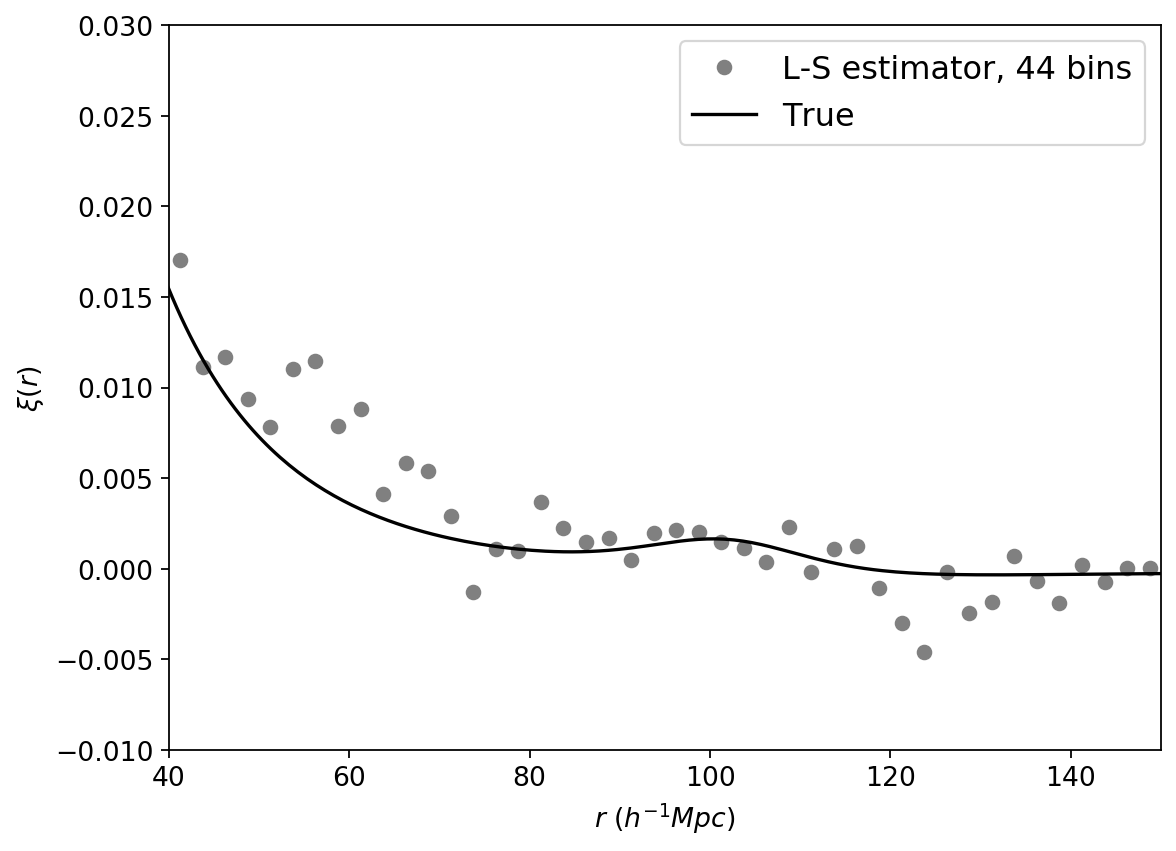

In [6]:
Plin = cosmology.LinearPower(cosmo_model, redshift, transfer='EisensteinHu')
CF = cosmology.correlation.CorrelationFunction(Plin)
xi_model = CF(s)

#alpha_samp = 1.00
#s_samp = np.linspace(40, 150, 20)
#xi_samp = CF(s_samp * alpha_samp)
#xi_samp = CF(s_samp)
#noise = np.random.normal(0, 0.0002, size=len(xi_samp))
#xi_samp += noise

boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

s_samp, xi_samp = load_cf(result_dir, cat_tag, 'standard', seed=0)
s_true, xi_true = load_cf(cat_dir, cat_tag, 'true')


print(len(xi_samp))
plt.plot(s_samp, xi_samp, marker='o', ls='None', color='grey', label='L-S estimator, 44 bins')
plt.plot(s_true, xi_true, color='k', label='True')
plt.xlabel(r'$r$ $(h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.xlim(smin, smax)
plt.ylim(-0.01, 0.03)
plt.legend()

Set up bases and model

In [7]:
def cf_model(s):
    alpha_model = 1.05
    return CF(alpha_model*s)

In [8]:
def bases(s, cf_func=cf_model, p1=1, p2=1, p3=1):
    
    b1 = p1 * 1.0/s**2
    b2 = p2 * 1.0/s
    b3 = p3 * np.ones(len(s))
    
    b4 = cf_func(s)
    
    alpha = 1.01
    dalpha = 1-alpha
    dxi_dalpha = partial_derivative(cf_func(s), cf_func(alpha*s), dalpha)
    b5 = dalpha*dxi_dalpha
    
    return b1,b2,b3,b4,b5

In [9]:
base_names = ['a1', 'a2', 'a3', 'Bsq', 'C']
base_colors = ['magenta', 'red', 'orange', 'green', 'blue']

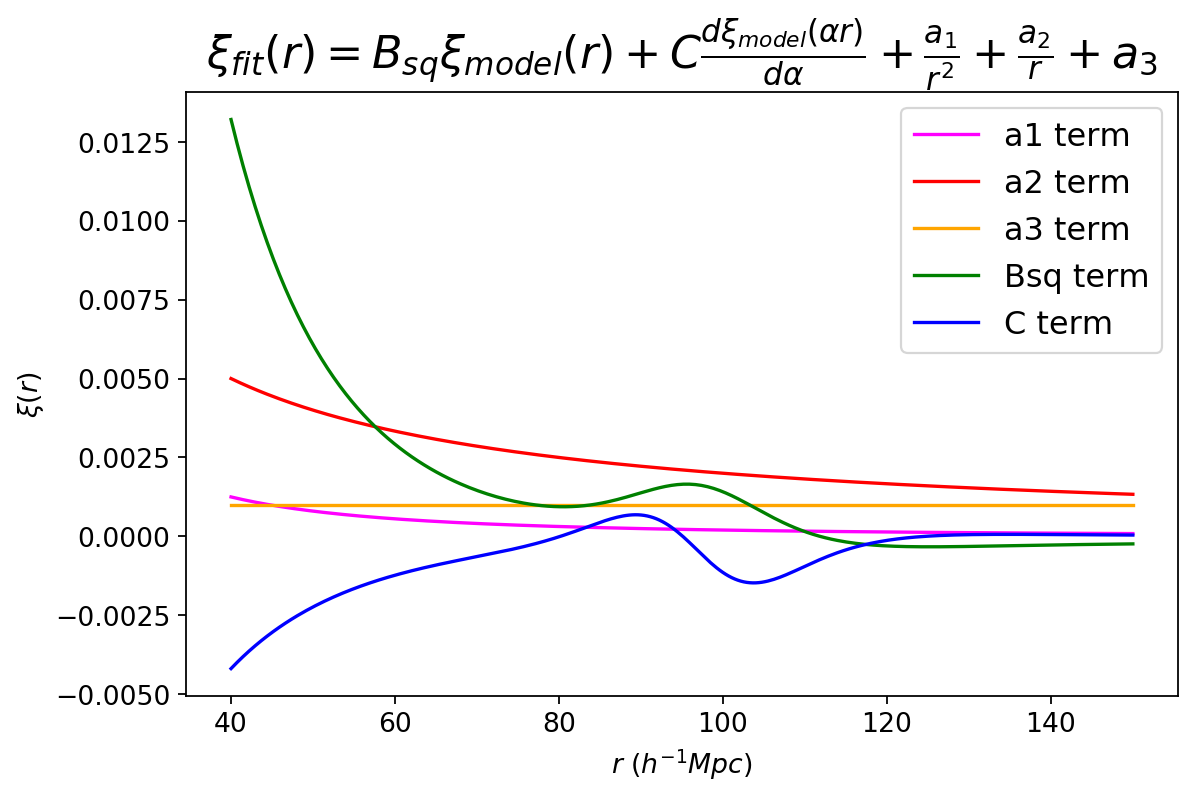

In [10]:
plt.figure(figsize=(8,5))

rescales = [0.5, 5, 1e3, 1, 0.1]
bs = bases(s)
for i in range(len(bs)):
    plt.plot(s, bs[i]/rescales[i], color=base_colors[i], label='{} term'.format(base_names[i]))

#plt.title(r'xi_fit = Bsq * xi_model + C * dxi_dalpha + a1/r**2 + a2/r + a3')
plt.title(r'$\xi_{fit}(r) = B_{sq} \xi_{model}(r) + C \frac{d\xi_{model}(\alpha r)}{d\alpha} + \frac{a_1}{r^2} + \frac{a_2}{r} + a_3$',
         fontdict = {'fontsize' : 20})
plt.xlabel(r'$r$ $(h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.legend()

In [11]:
def xi_fit(s, a1, a2, a3, Bsq, C):
    b1,b2,b3,b4,b5 = bases(s)
    return a1*b1 + a2*b2 + a3*b3 + Bsq*b4 + C*b5

Perform fit to model. The value for C is related to the fit for alpha: alpha = 1+C*dalpha, where dalpha has been set to 0.01.

In [12]:
guess = np.ones(5)
popt, pcov = scipy.optimize.curve_fit(xi_fit, s_samp, xi_samp, guess)

for i in range(len(popt)):
    print('{}: {:.4f}'.format(base_names[i], popt[i]))

a1: 2.8183
a2: 0.5445
a3: -0.0052
Bsq: 0.2982
C: -6.4076


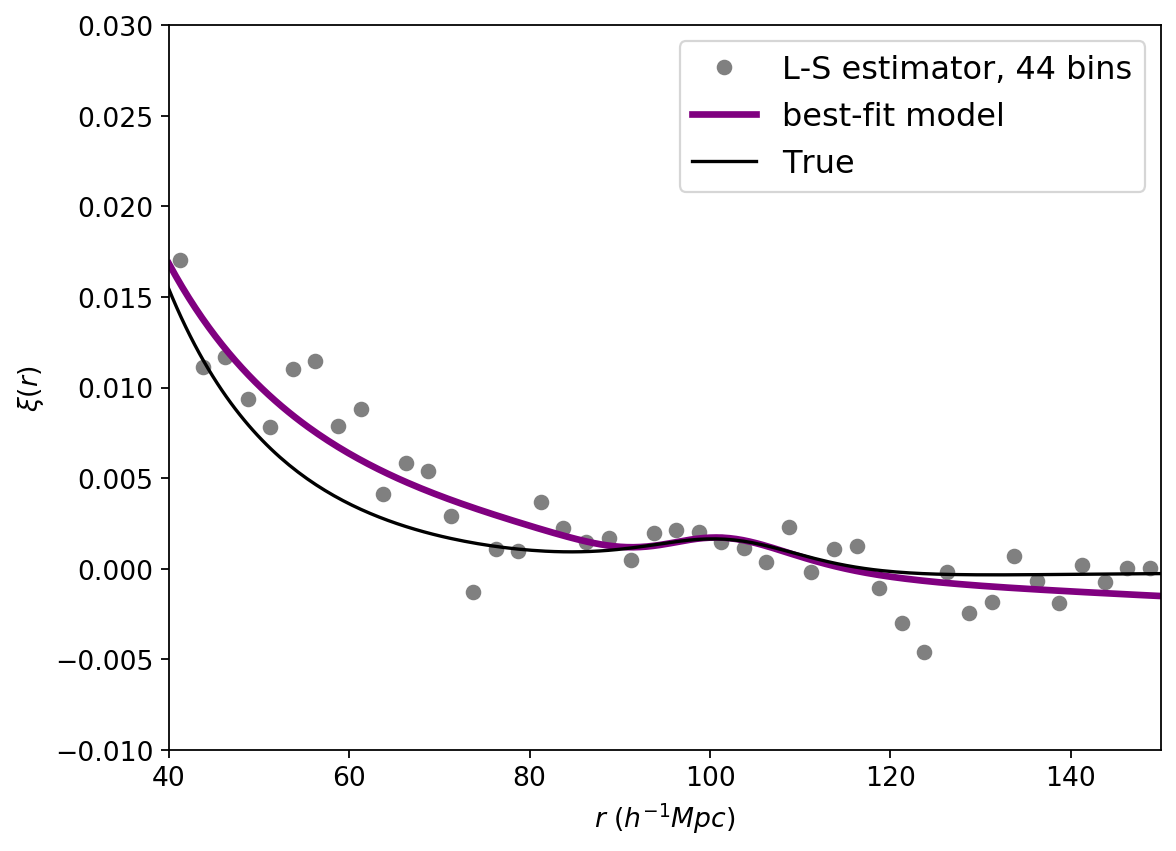

In [13]:
plt.plot(s_samp, xi_samp, marker='o', ls='None', color='grey', label='L-S estimator, 44 bins')
plt.plot(s, xi_fit(s, *popt), color='purple', label='best-fit model', lw=3)
plt.plot(s_true, xi_true, color='k', label='True')
plt.xlabel(r'$r$ $(h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.xlim(smin, smax)
plt.ylim(-0.01, 0.03)
plt.legend()


Check out the basis functions, multiplied by the fit value, so the sum equals the final fit:

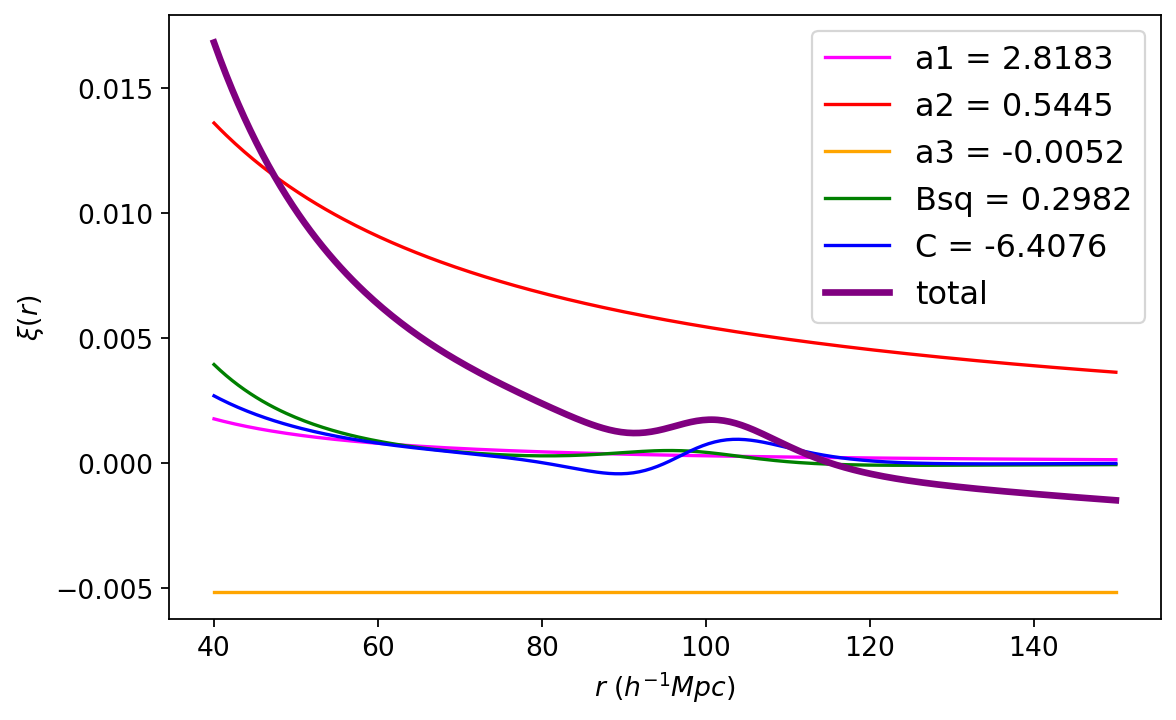

In [14]:
plt.figure(figsize=(8,5))
bs = bases(s)
total = np.zeros(len(s))
for i in range(len(bs)):
    total += popt[i]*bs[i]
    plt.plot(s, popt[i]*bs[i], color=base_colors[i], label='{} = {:.4f}'.format(base_names[i], popt[i]))
plt.plot(s, total, color='purple', label='total', lw=3)
plt.xlabel(r'$r$ $(h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.legend()

It worked! Reducing the noise gives a better fit. Can also change the value of alpha and see the results.

# BAO with projection estimator

In [15]:
def load_cfs(directory, cat_tag, proj, seeds):
    rs = []
    xis = []
    amps = []
    for i in range(len(seeds)):
        r, xi, amp = load_cf(directory, cat_tag, proj, seed=seeds[i])
        rs.append(r)
        xis.append(xi)
        amps.append(amp)
    rs = np.array(rs)
    xis = np.array(xis)
    amps = np.array(amps)
    return rs, xis, amps

a1: 8.5586
a2: 0.2730
a3: -0.0032
Bsq: 0.5882
C: -4.1838


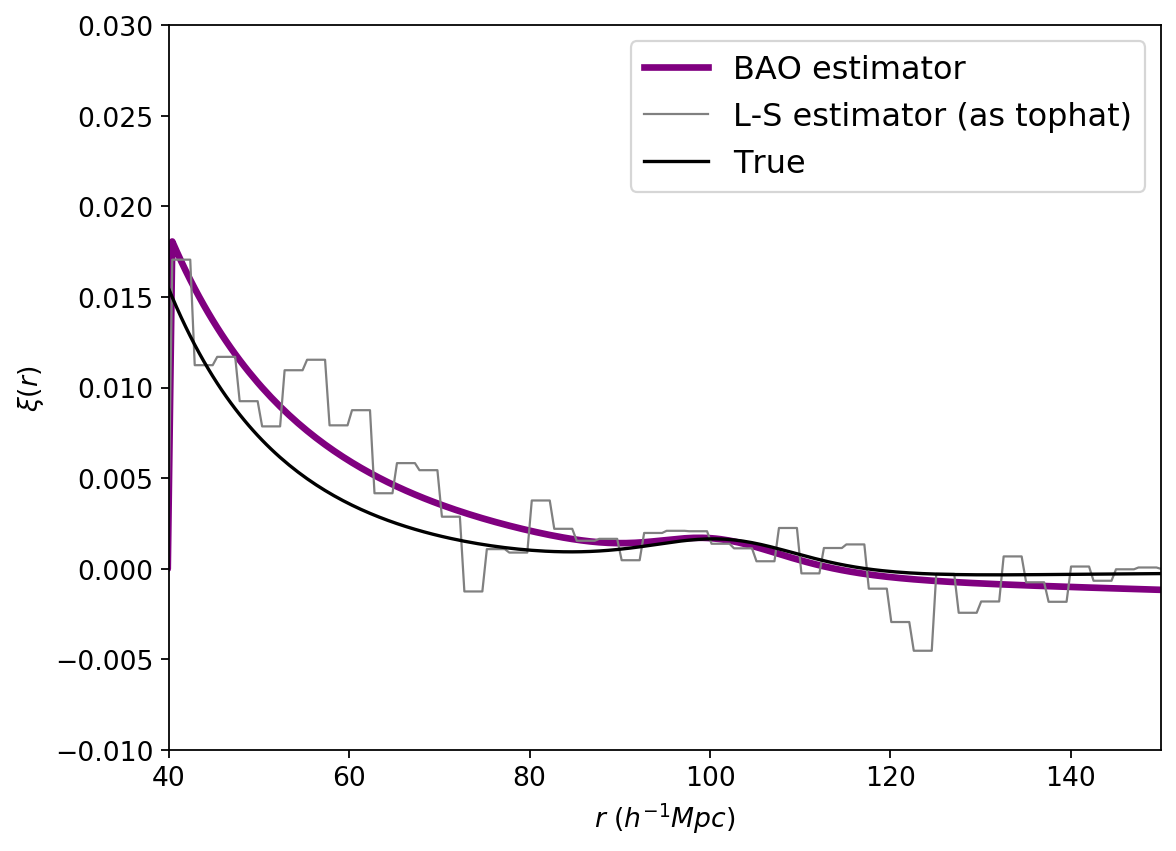

In [16]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
seed = 0
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

projs = ['bao_alpha1.05', 'tophat_n44']
proj_colors = ['purple', 'grey']
proj_labels = ['BAO estimator', 'L-S estimator (as tophat)']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

for i in range(len(projs)):
    
    proj = projs[i]
    r, xi, amp = load_cf(result_dir,cat_tag, proj, seed=seed)
    
    if 'bao' in proj:
        for j in range(len(amp)):
            print('{}: {:.4f}'.format(base_names[j], amp[j]))
        lw = 3
    else:
        lw = 1
    plt.plot(r, xi, color=proj_colors[i], label=proj_labels[i], lw=lw)

plt.plot(s_true, xi_true, color='k', label='True')
plt.xlim(smin, smax)
plt.ylim(-0.01, 0.03)
plt.xlim(rmin, rmax)    
plt.xlabel(r'$r$ $(h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.legend()

See base breakdown:

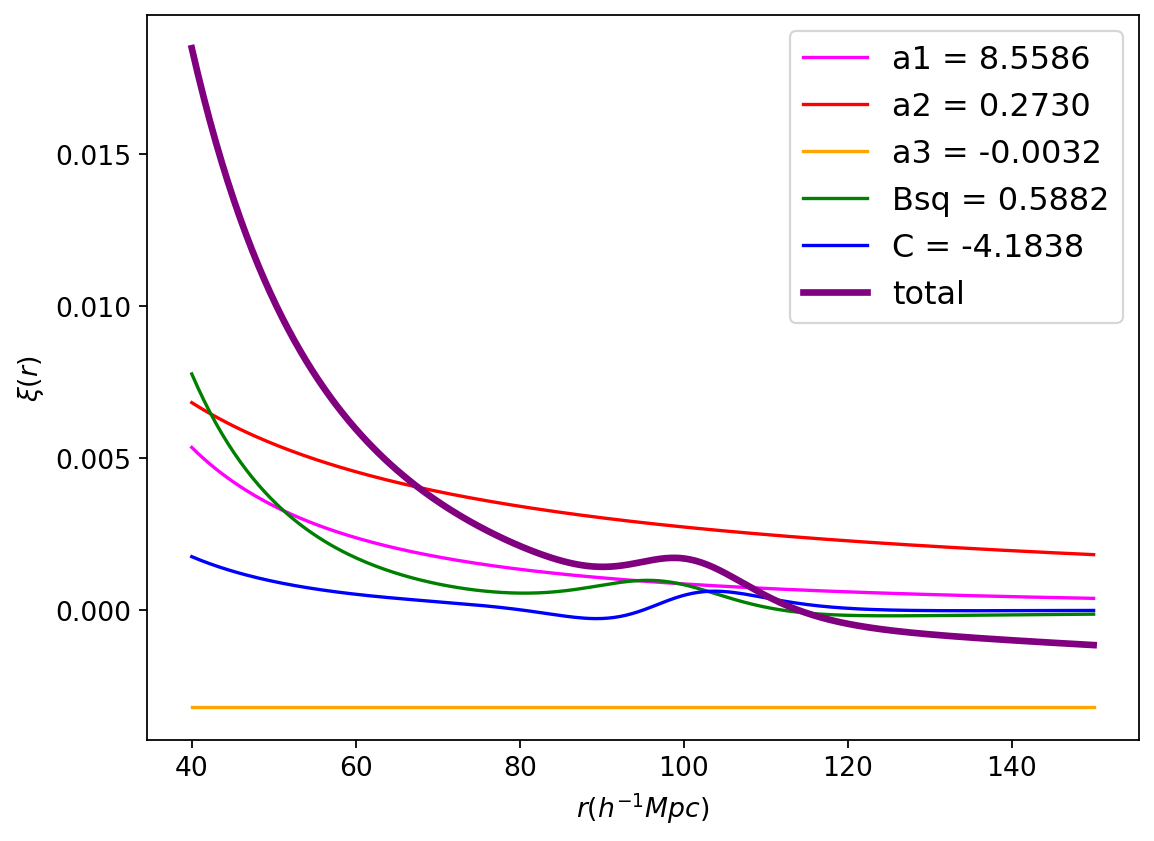

In [17]:
proj = 'bao_alpha1.05'
r, xi, amp = load_cf(result_dir, cat_tag, proj, seed=0)

bs = bases(s)
total = np.zeros(len(s))
for i in range(len(bs)):
    total += amp[i]*bs[i]
    plt.plot(s, amp[i]*bs[i], color=base_colors[i], label='{} = {:.4f}'.format(base_names[i], amp[i]))
plt.plot(s, total, color='purple', label='total', lw=3)
plt.xlabel(r'$r (h^{-1}Mpc)$')
plt.ylabel(r'$\xi(r)$')
plt.legend()

### It works!!!!